<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/GWAS_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import data
data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")

In [2]:
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [3]:
## Examine the structure of the data
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [4]:
## Check the number of columns and rows
dim(data)

[1] 1000    8

In [5]:
## Show the first 6 rows of the dataset
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [6]:
## Check for NA values
table(is.na(data))


FALSE 
 8000 

In [7]:
## Remove rows with NA values, if any exist
data <- data[rowSums(is.na(data)) == 0, ]

## Remove columns with NA values, if any exist (This can be potentially dangerous, I commented it out. Uncomment only if necessary.)
# data <- data[, colSums(is.na(data)) == 0]

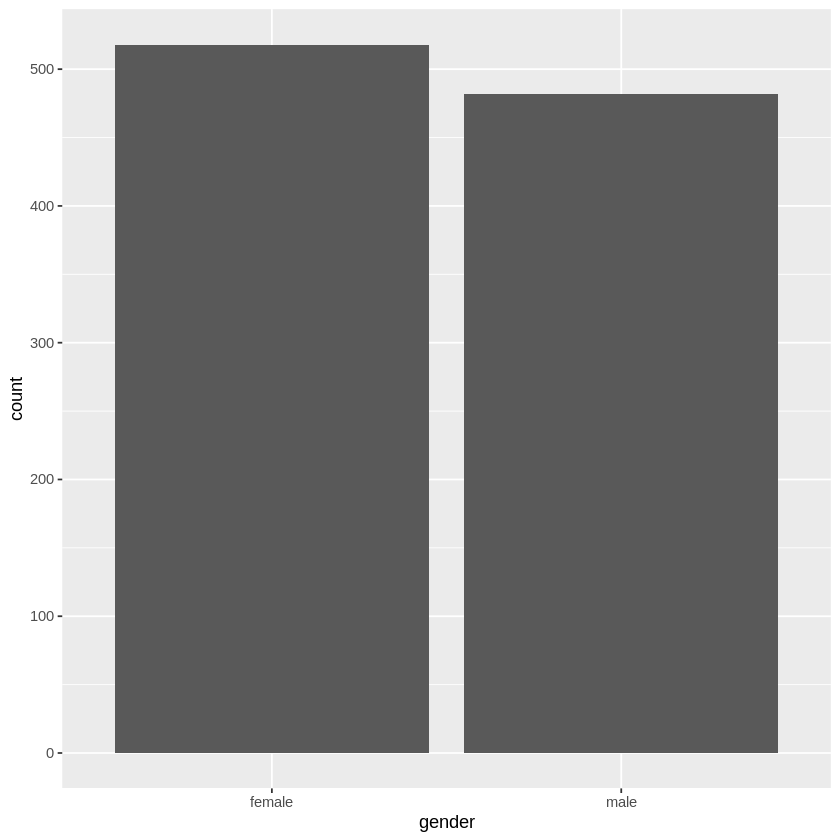

In [8]:
# 3. Visualization
## Load required library
library(ggplot2)

## Basic ggplot2 barplot
ggplot(data, aes(x = gender)) +
    geom_bar()

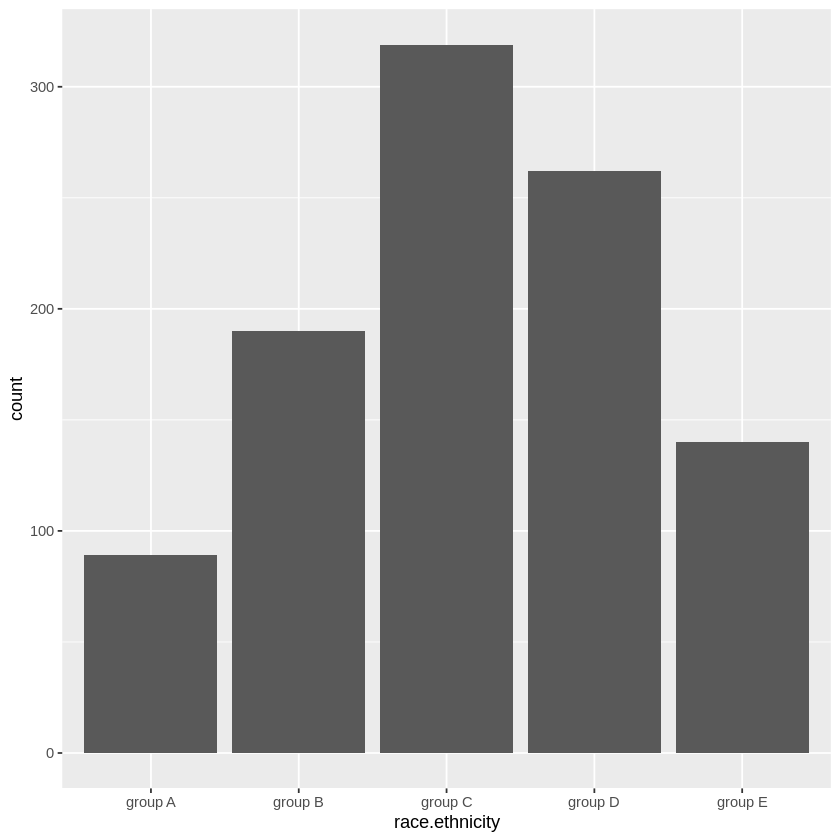

In [9]:
ggplot(data, aes(x = race.ethnicity)) +
    geom_bar()

In [10]:
# Create a data frame with the count of genders
data_new <- data.frame(table(data$gender))
colnames(data_new) <- c("gender", "freq") # Rename the columns
head(data_new)

,gender,freq
,<fct>,<int>
1,female,518
2,male,482


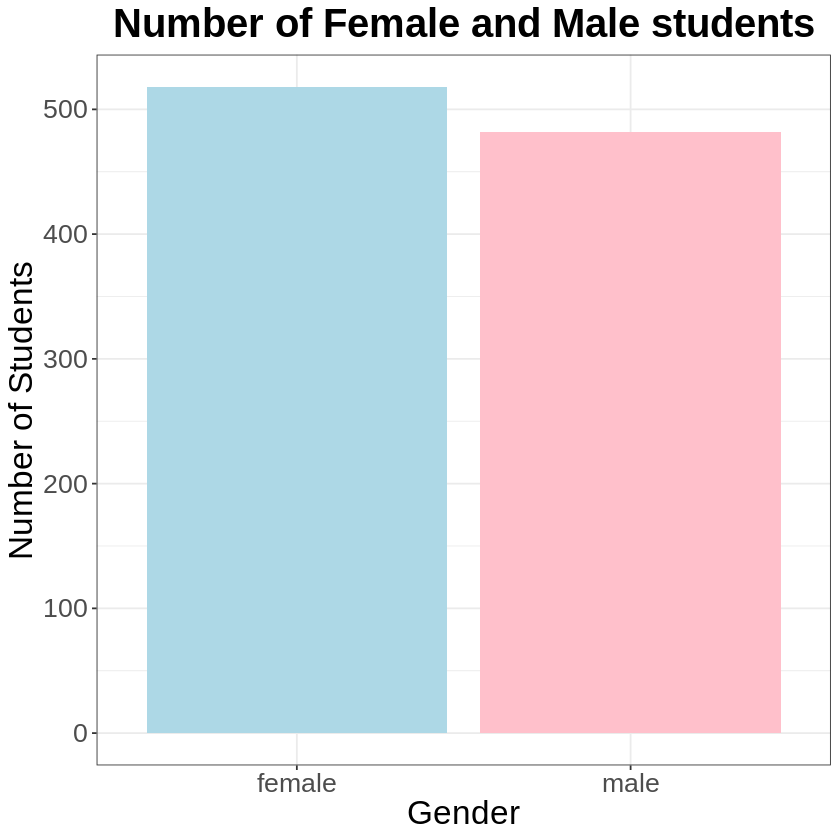

In [11]:
## Improved barplot design
ggplot(data_new, aes(x = gender, y = freq, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") + # remove legend
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
    scale_fill_manual(values = c("lightblue", "pink")) # Custom colors

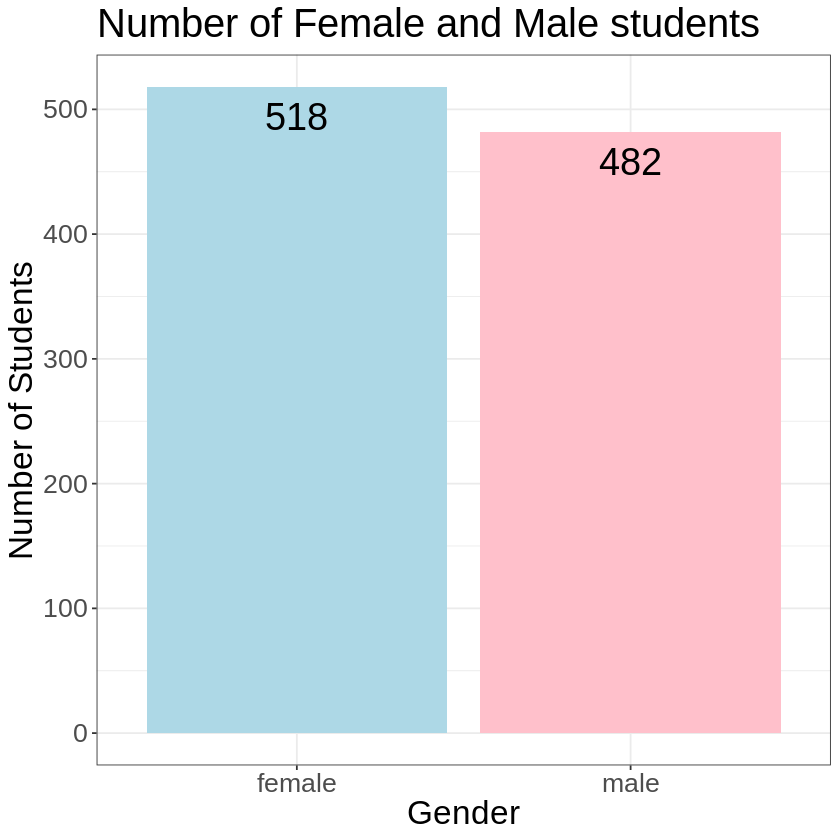

In [12]:
## Barplot with multiple variables
ggplot(data_new, aes(x = gender, y = freq, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    geom_text(aes(label = freq), vjust = 1.6, color = "black", size = 8) +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") +
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    scale_fill_manual(values = c("lightblue", "pink"))

In [14]:
## Barplot with grouped data
data_new_2 <- data.frame(table(data$gender, data$test.preparation.course))
colnames(data_new_2) <- c("gender", "test.preparation.course", "freq")
head(data_new_2)

,gender,test.preparation.course,freq
,<fct>,<fct>,<int>
1,female,completed,184
2,male,completed,174
3,female,none,334
4,male,none,308


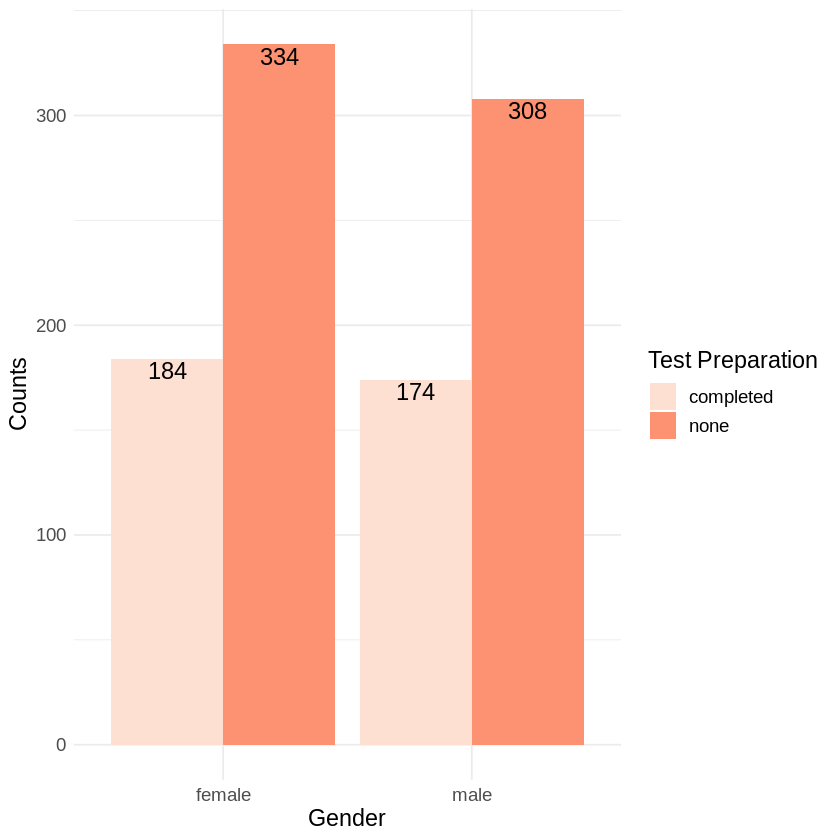

In [15]:
### Create grouped barplots
ggplot(data_new_2, aes(x = gender, y = freq, fill = test.preparation.course)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = freq),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(fill = "Test Preparation", y = "Counts", x = "Gender") +
    scale_fill_brewer(palette = "Reds")

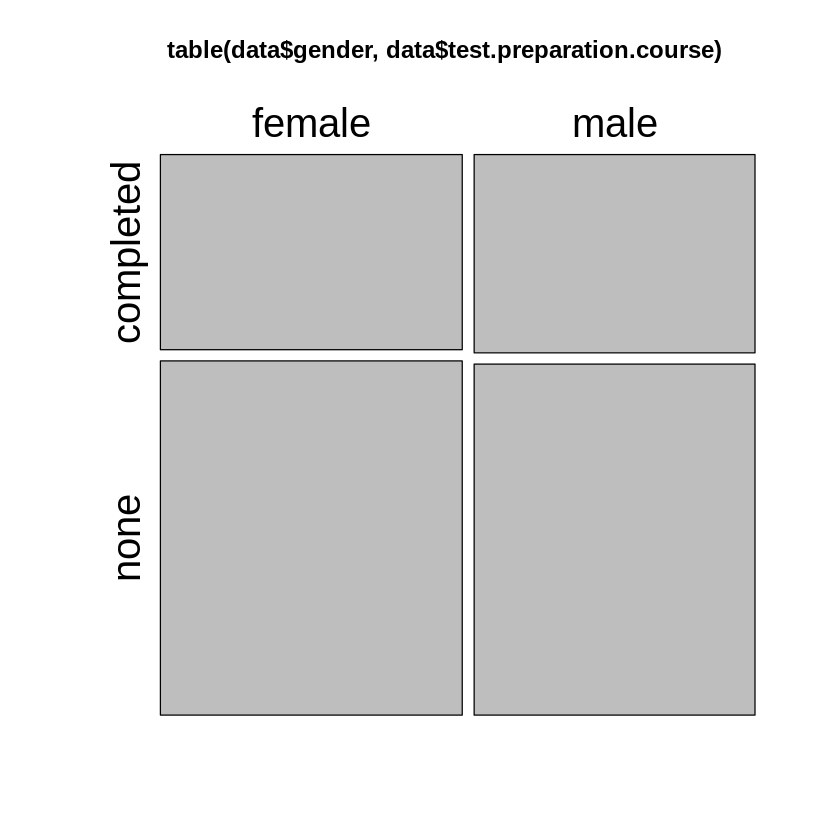

In [16]:
## Mosaicplot
mosaicplot(table(data$gender, data$test.preparation.course), cex = 2)

In [17]:
# Ensure pacman is installed and loaded
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Install qqman package
pacman::p_load("qqman")

# loading library
library(qqman)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘calibrate’



qqman installed



In [18]:
# Check the structure of the dataset
str(gwasResults)

'data.frame':	16470 obs. of  4 variables:
 $ SNP: chr  "rs1" "rs2" "rs3" "rs4" ...
 $ CHR: int  1 1 1 1 1 1 1 1 1 1 ...
 $ BP : int  1 2 3 4 5 6 7 8 9 10 ...
 $ P  : num  0.915 0.937 0.286 0.83 0.642 ...


In [19]:
# Display the first 6 rows of data
head(gwasResults)

,SNP,CHR,BP,P
,<chr>,<int>,<int>,<dbl>
1,rs1,1,1,0.9148060
2,rs2,1,2,0.9370754
3,rs3,1,3,0.2861395
4,rs4,1,4,0.8304476
5,rs5,1,5,0.6417455
6,rs6,1,6,0.5190959


In [20]:
# Count SNPs on each chromosome
print(as.data.frame(table(gwasResults$CHR)))

   Var1 Freq
1     1 1500
2     2 1191
3     3 1040
4     4  945
5     5  877
6     6  825
7     7  784
8     8  750
9     9  721
10   10  696
11   11  674
12   12  655
13   13  638
14   14  622
15   15  608
16   16  595
17   17  583
18   18  572
19   19  562
20   20  553
21   21  544
22   22  535


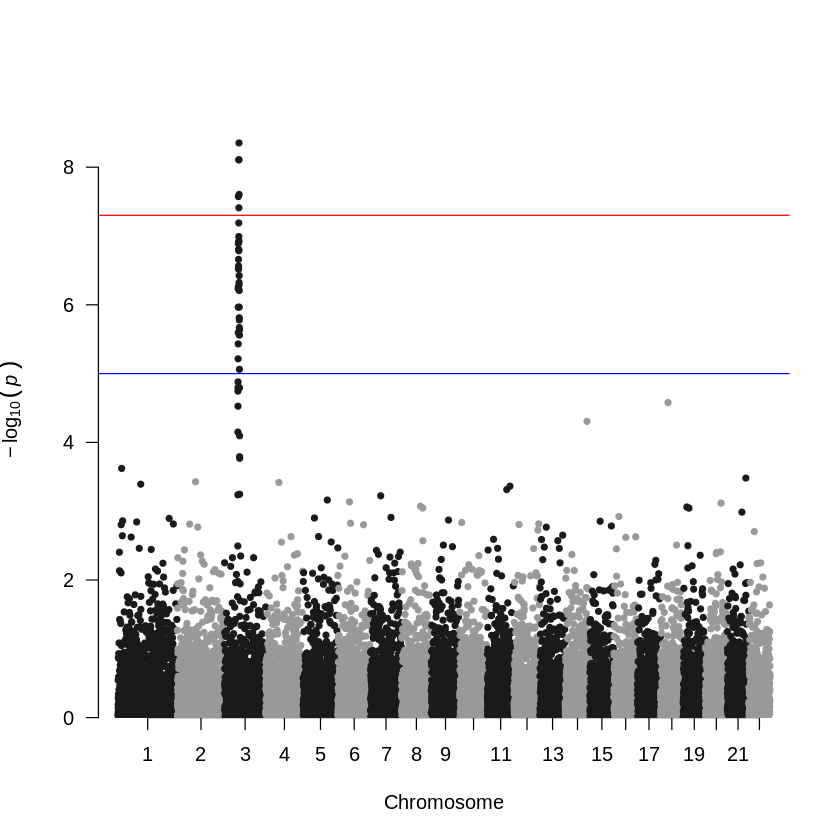

In [21]:
# Create Manhattan plots using default arguments and then with specified columns
manhattan(gwasResults)

manhattan(gwasResults, chr = "CHR", bp = "BP", snp = "SNP", p = "P")

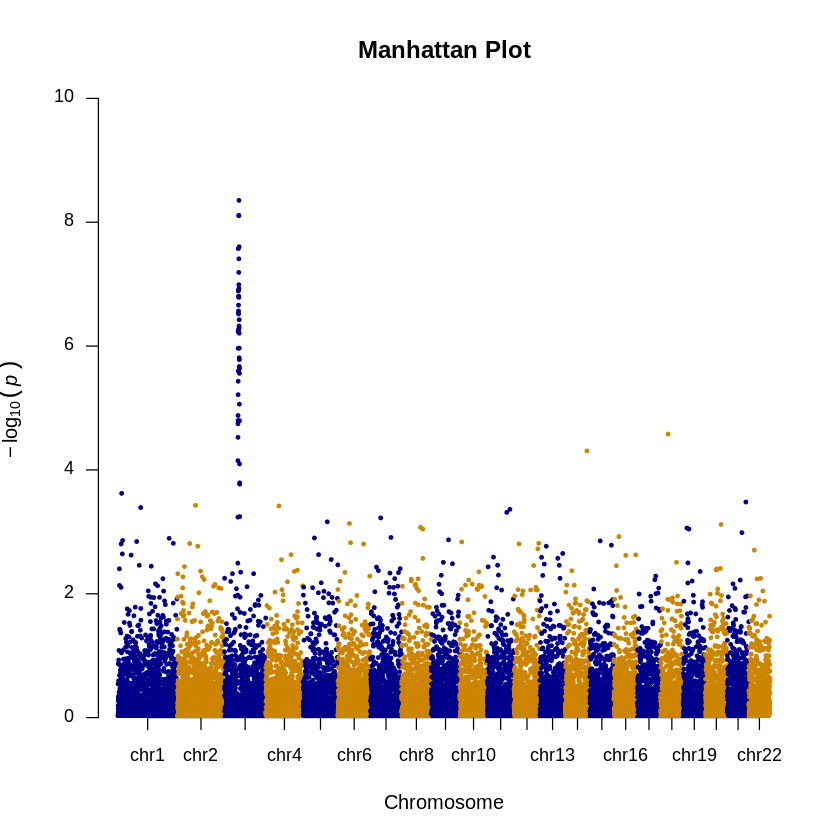

In [22]:
# Customize the Manhattan plot's appearance
manhattan(gwasResults,
          main = "Manhattan Plot", ylim = c(0, 10), cex = 0.6, cex.axis = 0.9,
          col = c("blue4", "orange3"), suggestiveline = FALSE, genomewideline = FALSE,
          chrlabs = paste0("chr", c(1:22)))